# **นาย รุ่ง คนยืน รหัสนักศึกษา 62070267**

# **Assignment 2 : Text Scraping & Classification**

# Part 1 – Data Collection

## Import เครื่องมือที่ใช้

In [ ]:
import pandas as pd
import numpy as np
from numpy import loadtxt
import os
import requests
import re
import csv
from bs4 import BeautifulSoup
from urllib.request import urlopen
from sklearn.linear_model import LogisticRegression
import nltk
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## สร้างฟังก์ชันสำหรับการ Scrap ข้อมูล

In [ ]:
!mkdir data

In [ ]:
# !mkdir '/data' datastore
# /content/data
os.mkdir("/content/data/datastore")
os.mkdir("/content/data/target")
os.mkdir("/content/data/datastore/content")
os.mkdir("/content/data/datastore/heading")
os.mkdir("/content/data/datastore/heading_plus_content")

In [ ]:
def get_link_main(): #เอาลิ้งจากหน้าหลักมาเก็บไว้ในลิสต์ เพื่อให้ง่ายต่อการทำ Web Crawling
  links = []
  link = urlopen("http://www.it.kmitl.ac.th/~teerapong/news_archive/index.html")
  soup = BeautifulSoup(link.read())
  link_all = soup.find_all('a')
  for link in link_all:
    archive = 'http://www.it.kmitl.ac.th/~teerapong/news_archive/' + link['href']
    links.append(archive)
  links = links[0:12]
  return links

def get_articles(links): 
  #เปิดลิ้งจากหน้าหลักแล้วเก็บลิ้งข้างในเพื่อเข้าถึงบทความทั้งหมดในแต่ละเดือน
  title_list = [] #ลิสต์สำหรับเก็บลิ้งบทความ
  for title in links: 
    link_title = urlopen(title)
    soup2 = BeautifulSoup(link_title.read())
    link_all2 = soup2.find_all('tbody')
    for link in link_all2:
      titles = link.find_all('a')
      for arti in titles:
        title = 'http://www.it.kmitl.ac.th/~teerapong/news_archive/' + arti['href']
        title_list.append(title)
  return title_list

def get_target(links):
  #เป็นขั้นตอนการเก็บ target ในที่นี้คือชื่อหมวดหมู่ของบทความแต่ละบทความ
  for link in links:
    get_data = requests.get(link)
    get_data.encoding = 'utf-8'
    soup2 = BeautifulSoup(get_data.text, 'html.parser')
    link_all2 = soup2.find_all('tbody')
    target_file = open('data/target/' + "category.txt", "a")
    for target in link_all2:
      cats = target.find_all('td', class_='category')
      for targett in cats:
        # print(targett)
        cat = targett.get_text().strip('\xa0') #เหตุเกิดจากหลังจากทำ DataFrame เมื่อลอง .values แล้วกลับมี '\xa0' โผล่มาข้างหน้า target 
        if "N/A" not in cat:
          target_file.write(cat)
          target_file.write('\n')

In [ ]:
def create_AllArticles_file(url):
  #ขั้นตอนการสร้างไฟล์ txt ที่มีข้อมูล Ariticles ที่ต้องการทั้งหมด
  for link in url:
    get_data = requests.get(link)
    get_data.encoding = 'utf-8'
    soup = BeautifulSoup(get_data.text, 'html.parser')
    find_word = soup.find('div', class_='main')
    article = find_word.find_all('p', class_=False)

    #สร้างไฟล์โดยกำหนดชื่อ
    my_file = open('data/datastore/' + "AllArticles_OnlyContent.txt", "a")
    content = open('data/datastore/content/' + link[50:66] + '.txt', "wt")
    heading = open('data/datastore/heading/' + link[50:66] + '.txt', "wt")

    header = find_word.find('h2').text
    my_file2 = open('data/datastore/' + "AllArticles_HeadingPlusContent.txt", "a")
    heading_plus = open('data/datastore/heading_plus_content/' + link[50:66] + '.txt', "wt")
    heading_plus.write(header)
    heading.write(header)
    my_file2.write(header + ' ') #ให้ + ช่องว่าง เพื่อแบ่งช่วงระหว่างหัวเรื่องกับเนื้อหา
    for ar in article:
      artt = ar.get_text()
      content.write(artt)
      my_file.write(artt)
      heading_plus.write(artt)
      my_file2.write(artt)
    my_file.write('\n')
    my_file2.write('\n')

## เรียกใช้งานฟังก์ชัน

In [ ]:
links = get_link_main() #Link หน้า main

In [ ]:
title_list = get_articles(links) #Link หน้ารวมบทความ

In [ ]:
get_target(links) #เก็บ Category

In [ ]:
#ฟังก์ชันสร้างไฟล์ที่ใช้เก็บ Articles ไม่ว่าจะเป็น AllArticles_HeadingPlusContent.txt, AllArticles_OnlyContent.txt และไฟล์ย่อยที่อยู่ในส่วน content, heading และ heading_plus_content
create_AllArticles_file(title_list)

In [ ]:
#                        _oo0oo_
#                       o8888888o
#                       88" . "88
#                       (| -_- |)
#                       0\  =  /0
#                     ___/`---'\___
#                   .' \|     |// '.
#                  / \|||  :  |||// \
#                 / _||||| -:- |||||- \
#                |   | \\  -  /// |   |
#                | \_|  ''\---/''  |_/ |
#                \  .-\__  '-'  ___/-. /
#              ___'. .'  /--.--\  `. .'___
#           ."" '<  `.___\_<|>_/___.' >' "".
#          | | :  `- \`.;`\ _ /`;.`/ - ` : | |
#          \  \ `_.   \_ __\ /__ _/   .-` /  /
#      =====`-.____`.___ \_____/___.-`___.-'=====
#                        `=---='

# Part 2 – Text Classification

### Create Contain Text DataFrame 

In [ ]:
#สร้าง DataFrame ที่ใช้งานหลัก
df_text = pd.read_csv('/content/data/datastore/AllArticles_OnlyContent.txt', sep='\n', header=None) 
df_text.columns = ['Text_only_content']

In [ ]:
df_text

,Text_only_content
0,The sporting industry has come a long way sinc...
1,Asian quake hits European sharesShares in Euro...
2,BT is offering customers free internet telepho...
3,Barclays shares up on merger talkShares in UK ...
4,England centre Olly Barkley has been passed fi...
...,...
1403,Woodward eyes Brennan for LionsToulouse's form...
1404,"The trial of Bernie Ebbers, former chief execu..."
1405,Yukos accused of lying to courtRussian oil fir...
1406,Russian oil company Yukos has dropped the thre...


In [ ]:
fin = open("/content/data/datastore/AllArticles_HeadingPlusContent.txt","r")
raw_documents_w_header = fin.readlines()
fin.close()

In [ ]:
df_text['Text_w_header'] = raw_documents_w_header

In [ ]:
df_text #หลังจากนำข้อมูล text ทั้งสองชนิดเข้าไปใน DataFrame

,Text_only_content,Text_w_header
0,The sporting industry has come a long way sinc...,21st-Century Sports: How Digital Technology Is...
1,Asian quake hits European sharesShares in Euro...,Asian quake hits European shares Asian quake h...
2,BT is offering customers free internet telepho...,BT offers free net phone calls BT is offering ...
3,Barclays shares up on merger talkShares in UK ...,Barclays shares up on merger talk Barclays sha...
4,England centre Olly Barkley has been passed fi...,Barkley fit for match in Ireland England centr...
...,...,...
1403,Woodward eyes Brennan for LionsToulouse's form...,Woodward eyes Brennan for Lions Woodward eyes ...
1404,"The trial of Bernie Ebbers, former chief execu...",WorldCom trial starts in New York The trial of...
1405,Yukos accused of lying to courtRussian oil fir...,Yukos accused of lying to court Yukos accused ...
1406,Russian oil company Yukos has dropped the thre...,Yukos drops banks from court bid Russian oil c...


### Tokenizing & Normalize Text

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
tokenize = CountVectorizer().build_tokenizer() #ใช้ CountVectorizer เพื่อสร้าง Tokenizer 

In [ ]:
from sklearn.feature_extraction import text 
def token_stop(txt): #ฟังก์ชันสำหรับสร้าง Token และทำ stopwords ไปในตัว
    stopwords = text.ENGLISH_STOP_WORDS
    tokens = tokenize(txt)
    stopp = [word for word in tokens if word not in stopwords]
    return stopp

Apply Function token_stop

In [ ]:
df_text['Text_only_content_Token_Stop'] = df_text['Text_only_content'].apply(lambda x: token_stop(x.lower()))

In [ ]:
df_text['Text_w_header_Token_Stop'] = df_text['Text_w_header'].apply(lambda x: token_stop(x.lower()))

In [ ]:
category = pd.read_csv('/content/data/target/category.txt', header = None, delimiter='\n')

In [ ]:
df_text.insert(0, 'Class_label', category) #insert ตัวแปร Y หรือคอลัมน์ Category

In [ ]:
df_text.head()

,Class_label,Text_only_content,Text_w_header,Text_only_content_Token_Stop,Text_w_header_Token_Stop
0,technology,The sporting industry has come a long way sinc...,21st-Century Sports: How Digital Technology Is...,"[sporting, industry, come, long, way, 60s, car...","[21st, century, sports, digital, technology, c..."
1,business,Asian quake hits European sharesShares in Euro...,Asian quake hits European shares Asian quake h...,"[asian, quake, hits, european, sharesshares, e...","[asian, quake, hits, european, shares, asian, ..."
2,technology,BT is offering customers free internet telepho...,BT offers free net phone calls BT is offering ...,"[bt, offering, customers, free, internet, tele...","[bt, offers, free, net, phone, calls, bt, offe..."
3,business,Barclays shares up on merger talkShares in UK ...,Barclays shares up on merger talk Barclays sha...,"[barclays, shares, merger, talkshares, uk, ban...","[barclays, shares, merger, talk, barclays, sha..."
4,sport,England centre Olly Barkley has been passed fi...,Barkley fit for match in Ireland England centr...,"[england, centre, olly, barkley, passed, fit, ...","[barkley, fit, match, ireland, england, centre..."


## Stemming

In [ ]:
from nltk.stem.porter import PorterStemmer #stemming โดยใช้วิธี PorterStemmer
def stemmer(doc): #ฟังก์ชันสำหรับการ stemming 
    stemmer = PorterStemmer()
    stemm = [stemmer.stem(word) for word in doc]
    return stemm

In [ ]:
df_text['Text_only_content_Stemming'] = df_text['Text_only_content_Token_Stop'].apply(lambda x: stemmer(x))
df_text['Text_w_header_Stemming'] = df_text['Text_w_header_Token_Stop'].apply(lambda x: stemmer(x))

In [ ]:
df_text.head()

,Class_label,Text_only_content,Text_w_header,Text_only_content_Token_Stop,Text_w_header_Token_Stop,Text_only_content_Stemming,Text_w_header_Stemming
0,technology,The sporting industry has come a long way sinc...,21st-Century Sports: How Digital Technology Is...,"[sporting, industry, come, long, way, 60s, car...","[21st, century, sports, digital, technology, c...","[sport, industri, come, long, way, 60, carv, n...","[21st, centuri, sport, digit, technolog, chang..."
1,business,Asian quake hits European sharesShares in Euro...,Asian quake hits European shares Asian quake h...,"[asian, quake, hits, european, sharesshares, e...","[asian, quake, hits, european, shares, asian, ...","[asian, quak, hit, european, sharesshar, europ...","[asian, quak, hit, european, share, asian, qua..."
2,technology,BT is offering customers free internet telepho...,BT offers free net phone calls BT is offering ...,"[bt, offering, customers, free, internet, tele...","[bt, offers, free, net, phone, calls, bt, offe...","[bt, offer, custom, free, internet, telephon, ...","[bt, offer, free, net, phone, call, bt, offer,..."
3,business,Barclays shares up on merger talkShares in UK ...,Barclays shares up on merger talk Barclays sha...,"[barclays, shares, merger, talkshares, uk, ban...","[barclays, shares, merger, talk, barclays, sha...","[barclay, share, merger, talkshar, uk, bank, g...","[barclay, share, merger, talk, barclay, share,..."
4,sport,England centre Olly Barkley has been passed fi...,Barkley fit for match in Ireland England centr...,"[england, centre, olly, barkley, passed, fit, ...","[barkley, fit, match, ireland, england, centre...","[england, centr, olli, barkley, pass, fit, sun...","[barkley, fit, match, ireland, england, centr,..."


## Lemmatization

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer as wn
wn = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


### Lemmatizer without POS tagging

In [ ]:
#สร้างฟังก์ชันสำหรับการทำ Lemmatize
def lemmatizer(tokens): 
    lemma_text = [wn.lemmatize(word) for word in tokens]
    return lemma_text

In [ ]:
df_text['Text_only_content_lemmatize'] = df_text['Text_only_content_Token_Stop'].apply(lambda x : lemmatizer(x))
df_text['Text_w_header_lemmatize'] = df_text['Text_w_header_Token_Stop'].apply(lambda x : lemmatizer(x))

In [ ]:
df_text.head()

,Class_label,Text_only_content,Text_w_header,Text_only_content_Token_Stop,Text_w_header_Token_Stop,Text_only_content_Stemming,Text_w_header_Stemming,Text_only_content_lemmatize,Text_w_header_lemmatize
0,technology,The sporting industry has come a long way sinc...,21st-Century Sports: How Digital Technology Is...,"[sporting, industry, come, long, way, 60s, car...","[21st, century, sports, digital, technology, c...","[sport, industri, come, long, way, 60, carv, n...","[21st, centuri, sport, digit, technolog, chang...","[sporting, industry, come, long, way, 60, carv...","[21st, century, sport, digital, technology, ch..."
1,business,Asian quake hits European sharesShares in Euro...,Asian quake hits European shares Asian quake h...,"[asian, quake, hits, european, sharesshares, e...","[asian, quake, hits, european, shares, asian, ...","[asian, quak, hit, european, sharesshar, europ...","[asian, quak, hit, european, share, asian, qua...","[asian, quake, hit, european, sharesshares, eu...","[asian, quake, hit, european, share, asian, qu..."
2,technology,BT is offering customers free internet telepho...,BT offers free net phone calls BT is offering ...,"[bt, offering, customers, free, internet, tele...","[bt, offers, free, net, phone, calls, bt, offe...","[bt, offer, custom, free, internet, telephon, ...","[bt, offer, free, net, phone, call, bt, offer,...","[bt, offering, customer, free, internet, telep...","[bt, offer, free, net, phone, call, bt, offeri..."
3,business,Barclays shares up on merger talkShares in UK ...,Barclays shares up on merger talk Barclays sha...,"[barclays, shares, merger, talkshares, uk, ban...","[barclays, shares, merger, talk, barclays, sha...","[barclay, share, merger, talkshar, uk, bank, g...","[barclay, share, merger, talk, barclay, share,...","[barclays, share, merger, talkshares, uk, bank...","[barclays, share, merger, talk, barclays, shar..."
4,sport,England centre Olly Barkley has been passed fi...,Barkley fit for match in Ireland England centr...,"[england, centre, olly, barkley, passed, fit, ...","[barkley, fit, match, ireland, england, centre...","[england, centr, olli, barkley, pass, fit, sun...","[barkley, fit, match, ireland, england, centr,...","[england, centre, olly, barkley, passed, fit, ...","[barkley, fit, match, ireland, england, centre..."


## จัดรูปแบบใหม่ให้อยู่ในรูปของข้อความ

In [ ]:
#จัดรูปแบบใหม่อยู่ในรูปแบบข้อความ
text_token__only_content = []
for get in df_text['Text_only_content_Token_Stop']:
    text_token__only_content.append(' '.join(get))

text_token_w_header = []
for get in df_text['Text_w_header_Token_Stop']:
    text_token_w_header.append(' '.join(get))

In [ ]:
#จัดรูปแบบใหม่อยู่ในรูปแบบข้อความ
text_stemming_only_content = []
for get in df_text['Text_only_content_Stemming']:
    text_stemming_only_content.append(' '.join(get))

#จัดรูปแบบใหม่อยู่ในรูปแบบข้อความ
text_stemming_w_header = []
for get in df_text['Text_w_header_Stemming']:
    text_stemming_w_header.append(' '.join(get))

In [ ]:
#จัดรูปแบบใหม่อยู่ในรูปแบบข้อความ
text_lemma_only_content = []
for get in df_text['Text_only_content_lemmatize']:
    text_lemma_only_content.append(' '.join(get))

#จัดรูปแบบใหม่อยู่ในรูปแบบข้อความ
text_lemma_w_header = []
for get in df_text['Text_w_header_lemmatize']:
    text_lemma_w_header.append(' '.join(get))

In [ ]:
df_text['Text_only_content_Token_Stop'] = text_token__only_content
df_text['Text_w_header_Token_Stop'] = text_token_w_header
df_text['Text_only_content_Stemming'] = text_stemming_only_content
df_text['Text_w_header_Stemming'] = text_stemming_w_header
df_text['Text_only_content_lemmatize'] = text_lemma_only_content
df_text['Text_w_header_lemmatize'] = text_lemma_w_header

จากตรงนี้เราจะได้ไฟล์ที่ผ่านกระบวนการ Text preprocessing ที่อยู่ในรูปข้อความ โดยสามารถนำไปทำ Term Weighting ต่อได้

In [ ]:
df_text.head()

,Class_label,Text_only_content,Text_w_header,Text_only_content_Token_Stop,Text_w_header_Token_Stop,Text_only_content_Stemming,Text_w_header_Stemming,Text_only_content_lemmatize,Text_w_header_lemmatize
0,technology,The sporting industry has come a long way sinc...,21st-Century Sports: How Digital Technology Is...,sporting industry come long way 60s carved nic...,21st century sports digital technology changin...,sport industri come long way 60 carv nich root...,21st centuri sport digit technolog chang face ...,sporting industry come long way 60 carved nich...,21st century sport digital technology changing...
1,business,Asian quake hits European sharesShares in Euro...,Asian quake hits European shares Asian quake h...,asian quake hits european sharesshares europe ...,asian quake hits european shares asian quake h...,asian quak hit european sharesshar europ lead ...,asian quak hit european share asian quak hit e...,asian quake hit european sharesshares europe l...,asian quake hit european share asian quake hit...
2,technology,BT is offering customers free internet telepho...,BT offers free net phone calls BT is offering ...,bt offering customers free internet telephone ...,bt offers free net phone calls bt offering cus...,bt offer custom free internet telephon call si...,bt offer free net phone call bt offer custom f...,bt offering customer free internet telephone c...,bt offer free net phone call bt offering custo...
3,business,Barclays shares up on merger talkShares in UK ...,Barclays shares up on merger talk Barclays sha...,barclays shares merger talkshares uk banking g...,barclays shares merger talk barclays shares me...,barclay share merger talkshar uk bank group ba...,barclay share merger talk barclay share merger...,barclays share merger talkshares uk banking gr...,barclays share merger talk barclays share merg...
4,sport,England centre Olly Barkley has been passed fi...,Barkley fit for match in Ireland England centr...,england centre olly barkley passed fit sunday ...,barkley fit match ireland england centre olly ...,england centr olli barkley pass fit sunday nat...,barkley fit match ireland england centr olli b...,england centre olly barkley passed fit sunday ...,barkley fit match ireland england centre olly ...


In [ ]:
len(df_text['Text_only_content_Token_Stop'][0])

778

In [ ]:
len(df_text['Text_only_content_lemmatize'][0])

755

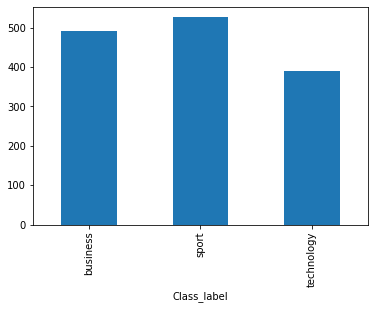

In [ ]:
df_text.groupby("Class_label").Class_label.count().plot.bar(ylim=0)

## Term Weighting : Term Frequency–Inverse Document Frequency (TF-IDF)

In [ ]:
#ฟังก์ชันสำหรับการทำกระบวนการ TF-IDF
def tfidf(cor):
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer(min_df = 5) #ตัดค่า min df ที่ 5 เพื่อลด noise ข้อมูล
    X = vectorizer.fit_transform(cor) 
    print(X.shape)
    return X

Vectorizer fit transform Text Only Content

In [ ]:
test = tfidf(df_text['Text_only_content'])

(1408, 7036)


In [ ]:
test = tfidf(df_text['Text_w_header'])

(1408, 7073)


In [ ]:
X_token_content = tfidf(df_text['Text_only_content_Token_Stop'])
X_stem_content = tfidf(df_text['Text_only_content_Stemming'])
X_lemma_content = tfidf(df_text['Text_only_content_lemmatize'])

(1408, 6771)
(1408, 4940)
(1408, 6091)


Vectorizer fit transform Text Content With Header

In [ ]:
X_token_header = tfidf(df_text['Text_w_header_Token_Stop'])
X_stem_header = tfidf(df_text['Text_w_header_Stemming'])
X_lemma_header = tfidf(df_text['Text_w_header_lemmatize'])

(1408, 6808)
(1408, 4956)
(1408, 6119)


## Modeling

ในส่วนของโมเดลนั้นจะนำมาใช้ทั้งสิ้น 5 โมเดลด้วยกัน คือ


1.   Logistic Regression
2.   Stochastic Gradient descent Classifier
3.   Multinomial Navie Bayes
4.   K-Nearest Neighbors Classifier
5.   Support Vector Classifier






In [ ]:
Y = df_text['Class_label']

## Logistic Regression

LogisticRegression เป็นโมเดลประเภท Classifer ที่สามารถใช้งานได้หลากหลายมาก การถดถอยโลจิสติกจะสร้างผลลัพธ์ในรูปแบบไบนารีซึ่งใช้ในการทำนายผลลัพธ์ของตัวแปรตามหมวดหมู่ ซึ่งสามารถนำไปใช้ได้กับ Multiple Classification ได้ด้วย 

In [ ]:
#ฟังก์ชันสำหรับการ tune model Logisic Regression
def tunelogistic(X, Y):
    from sklearn.linear_model import LogisticRegression

    model = LogisticRegression()

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) #ใช้ RepeatedStratifiedKFold เพื่อทำ Cross Validation ก่อนนำไป tuneing
    #Set Param
    Param = dict()
    Param['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
    Param['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
    Param['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
    #RandomizedSearchCV
    search = RandomizedSearchCV(model, Param, scoring='accuracy', n_jobs=-1, cv=cv) #ตั้ง n_jobs = -1 เพื่อให้ทำการ using all processors.
    #fit
    result = search.fit(X, Y)
    # summarize result
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)
    return result.best_params_

In [ ]:
#ฟังก์ชันสำหรับการสร้าง model Logistic Regression
def modellogis(X_train, Y_train, X_test, Y_test, solve, penal, C):
    from sklearn.linear_model import LogisticRegression
    model_logis = LogisticRegression(solver=solve, penalty= penal, C = C)
    model_logis.fit(X_train, Y_train)
    y_pred_logis = model_logis.predict(X_test)
    print('Accuracy Score(tuned) : %f' %(accuracy_score(Y_test, y_pred_logis)))
    return model_logis

### Test model with Only Content Data

*ลองนำโมเดลมาใช้กับ Only Content Data*

In [ ]:
#stemming
X_train, X_test, Y_train, Y_test = train_test_split(X_stem_content, Y, test_size=.3, random_state=42)

result_best = tunelogistic(X_stem_content, Y)
model_logis = modellogis(X_train, Y_train, X_test, Y_test, result_best['solver'], result_best['penalty'], result_best['C'])

Best Score: 0.9850861195542048
Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 100}
Accuracy Score(tuned) : 0.990544


นำผลลัพธ์ที่ได้เข้าสู่ DataFrame

In [ ]:
evala = {
    'Model': ['Logistic Regression'],
    'Accuracy' : accuracy_score(Y_test, model_logis.predict(X_test)),
    'Type' : 'stemming',
    'Data' : 'Only_Content'
}
eval_logis = pd.DataFrame(evala)

In [ ]:
#lemmatize

X_train, X_test, Y_train, Y_test = train_test_split(X_lemma_content, Y, test_size=.3, random_state=42)

result_best = tunelogistic(X_lemma_content, Y)
model_logis = modellogis(X_train, Y_train, X_test, Y_test, result_best['solver'], result_best['penalty'], result_best['C'])

Best Score: 0.9843785883147584
Best Hyperparameters: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 100}
Accuracy Score(tuned) : 0.990544


นำผลลัพธ์ที่ได้เข้าสู่ DataFrame

In [ ]:
evala = {
    'Model': ['Logistic Regression'],
    'Accuracy' : accuracy_score(Y_test, model_logis.predict(X_test)),
    'Type' : 'lemmatize',
    'Data' : 'Only_Content'
}
eval2 = pd.DataFrame(evala)
eval_logis = eval_logis.append(eval2)

### Test model with Content plus Header Data

*ลองนำโมเดลมาใช้กับ Content with Header Data*

In [ ]:
#stemming
X_train, X_test, Y_train, Y_test = train_test_split(X_stem_header, Y, test_size=.3, random_state=42)

result_best = tunelogistic(X_stem_header, Y)
model_logis = modellogis(X_train, Y_train, X_test, Y_test, result_best['solver'], result_best['penalty'], result_best['C'])

Best Score: 0.9843785883147584
Best Hyperparameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}
Accuracy Score(tuned) : 0.985816


นำผลลัพธ์ที่ได้เข้าสู่ DataFrame

In [ ]:
evala = {
    'Model': ['Logistic Regression'],
    'Accuracy' : accuracy_score(Y_test, model_logis.predict(X_test)),
    'Type' : 'stemming',
    'Data' : 'With_Header'
}
eval2 = pd.DataFrame(evala)
eval_logis = eval_logis.append(eval2)

In [ ]:
#lemmatize
X_train, X_test, Y_train, Y_test = train_test_split(X_lemma_header, Y, test_size=.3, random_state=42)

result_best = tunelogistic(X_lemma_header, Y)
model_logis = modellogis(X_train, Y_train, X_test, Y_test, result_best['solver'], result_best['penalty'], result_best['C'])

Best Score: 0.9843768996960487
Best Hyperparameters: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 100}
Accuracy Score(tuned) : 0.990544


นำผลลัพธ์ที่ได้เข้าสู่ DataFrame

In [ ]:
evala = {
    'Model': ['Logistic Regression'],
    'Accuracy' : accuracy_score(Y_test, model_logis.predict(X_test)),
    'Type' : 'lemmatize',
    'Data' : 'With_Header'
}
eval2 = pd.DataFrame(evala)
eval_logis = eval_logis.append(eval2)

### Summary

In [ ]:
eval_logis

,Model,Accuracy,Type,Data
0,Logistic Regression,0.990544,stemming,Only_Content
0,Logistic Regression,0.990544,lemmatize,Only_Content
0,Logistic Regression,0.985816,stemming,With_Header
0,Logistic Regression,0.990544,lemmatize,With_Header


จากผลสรุปตรงนี้จะเห็นได้ว่าการใช้ข้อมูล Only_Content จะทำให้ได้ค่า Accuracy ที่ดีกว่าแบบ With_Header 

## Stochastic Gradient descent Classifier

SGD เป็นลักษณะนามใช้โมเดลเชิงเส้นแบบปกติพร้อม Stochastic Gradient Descent

In [ ]:
#ฟังก์ชันสำหรับการ tune model SGD Classifier
def tunesgd(X, Y):
    from sklearn.linear_model import SGDClassifier

    model = SGDClassifier(random_state=1, max_iter=5, tol=1e-3)

    param = {'loss': ('hinge', 'log', 'modified_huber'),
            'penalty': ['none', 'l1', 'l2', 'elasticnet']}

    search = RandomizedSearchCV(model, param, cv=3, scoring='accuracy')
    result = search.fit(X, Y)
    # summarize result
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)
    return result.best_params_

In [ ]:
#ฟังก์ชันสำหรับการสร้าง model Stochastic Gradient descent Classifier
def sgdmodel(X_train, Y_train, X_test, Y_test, los, penal):
    from sklearn.linear_model import SGDClassifier
    sgd = SGDClassifier(loss=los, penalty=penal)
    sgd.fit(X_train, Y_train)
    y_pred = sgd.predict(X_test)
    print('Accuracy Score(tuned) : %f' %(accuracy_score(Y_test, y_pred)))
    return sgd

### Test model with Only Content Data

*ลองนำโมเดลมาใช้กับ Only Content Data*

In [ ]:
#stemming
X_train, X_test, Y_train, Y_test = train_test_split(X_stem_content, Y, test_size=.3, random_state=42)

result_best = tunesgd(X_stem_content, Y)

model_sgd = sgdmodel(X_train, Y_train, X_test, Y_test, result_best['loss'], result_best['penalty'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Best Score: 0.9801100878585794
Best Hyperparameters: {'penalty': 'none', 'loss': 'log'}
Accuracy Score(tuned) : 0.990544


นำผลลัพธ์ที่ได้เข้าสู่ DataFrame

In [ ]:
evala = {
    'Model': ['SGDClassifier'],
    'Accuracy' : accuracy_score(Y_test, model_sgd.predict(X_test)),
    'Type' : 'stemming',
    'Data' : 'Only_Content'
}
eval_sgd = pd.DataFrame(evala)

In [ ]:
#lemmatize
X_train, X_test, Y_train, Y_test = train_test_split(X_lemma_content, Y, test_size=.3, random_state=42)

result_best = tunesgd(X_lemma_content, Y)
model_sgd = sgdmodel(X_train, Y_train, X_test, Y_test, result_best['loss'], result_best['penalty'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Best Score: 0.9808193077167354
Best Hyperparameters: {'penalty': 'l2', 'loss': 'log'}
Accuracy Score(tuned) : 0.988180


นำผลลัพธ์ที่ได้เข้าสู่ DataFrame

In [ ]:
evala = {
    'Model': ['SGDClassifier'],
    'Accuracy' : accuracy_score(Y_test, model_sgd.predict(X_test)),
    'Type' : 'lemmatize',
    'Data' : 'Only_Content'
}
eval2 = pd.DataFrame(evala)
eval_sgd = eval_sgd.append(eval2)

### Test model with Content plus Header Data

*ลองนำโมเดลมาใช้กับ Content with Header Data*

In [ ]:
#stemming
X_train, X_test, Y_train, Y_test = train_test_split(X_stem_header, Y, test_size=.3, random_state=42)

result_best = tunesgd(X_stem_header, Y)

model_sgd = sgdmodel(X_train, Y_train, X_test, Y_test, result_best['loss'], result_best['penalty'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Best Score: 0.9815270153790318
Best Hyperparameters: {'penalty': 'l1', 'loss': 'log'}
Accuracy Score(tuned) : 0.985816


นำผลลัพธ์ที่ได้เข้าสู่ DataFrame

In [ ]:
evala = {
    'Model': ['SGDClassifier'],
    'Accuracy' : accuracy_score(Y_test, model_sgd.predict(X_test)),
    'Type' : 'stemming',
    'Data' : 'With_Header'
}
eval2 = pd.DataFrame(evala)
eval_sgd = eval_sgd.append(eval2)

In [ ]:
#lemmatize
X_train, X_test, Y_train, Y_test = train_test_split(X_lemma_header, Y, test_size=.3, random_state=42)

result_best = tunesgd(X_lemma_header, Y)
model_sgd = sgdmodel(X_train, Y_train, X_test, Y_test, result_best['loss'], result_best['penalty'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Best Score: 0.9801116000544391
Best Hyperparameters: {'penalty': 'l2', 'loss': 'hinge'}
Accuracy Score(tuned) : 0.988180


นำผลลัพธ์ที่ได้เข้าสู่ DataFrame

In [ ]:
evala = {
    'Model': ['SGDClassifier'],
    'Accuracy' : accuracy_score(Y_test, model_sgd.predict(X_test)),
    'Type' : 'lemmatize',
    'Data' : 'With_Header'
}
eval2 = pd.DataFrame(evala)
eval_sgd = eval_sgd.append(eval2)

###Summary

In [ ]:
eval_sgd

,Model,Accuracy,Type,Data
0,SGDClassifier,0.990544,stemming,Only_Content
0,SGDClassifier,0.988180,lemmatize,Only_Content
0,SGDClassifier,0.985816,stemming,With_Header
0,SGDClassifier,0.988180,lemmatize,With_Header


จากผลลัพธ์ที่ได้จะเห็นได้ว่าผลลัพธ์ที่ได้จะมีความใกล้เคียงกัน (จากการลองรันหลายๆรอบ) ซึ่งในการรันรอบนี้จะเห็นได้ว่าการใช้ Data With_Header โดยใช้วิธี lemmatize จะได้ค่า accuracy สูงสุดที่ 99%

## Multinomial Navie Bayes

*Naive Bayes มักจะใช้ในปัญหาการประมวลผลภาษาธรรมชาติ (NLP) Naive Bayes จะทำนายแท็กของข้อความ และคำนวณความน่าจะเป็นของแต่ละแท็กสำหรับข้อความที่กำหนดจากนั้นจึงส่งออกแท็กที่มีค่าสูงสุด*

In [ ]:
#ฟังก์ชันสำหรับการ tune model Multinomial Navie Bayes
def tunemultinb(X, Y):
    from sklearn.naive_bayes import MultinomialNB

    model = MultinomialNB()
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #Set Param
    param = {
        "alpha": [1.0],
        "fit_prior": [True, False],
    }
    #RandomizedSearchCV
    search = GridSearchCV(model, param, cv=cv,scoring='accuracy')
    #fit
    result = search.fit(X, Y)
    # summarize result
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)
    return result.best_params_

In [ ]:
#ฟังก์ชันสำหรับการสร้าง model Multinomial Navie Bayes
def multinbmodel(X_train, Y_train, X_test, Y_test, alpha_, fit_pr):
    from sklearn.naive_bayes import MultinomialNB
    multinb = MultinomialNB(fit_prior= False, alpha= 1.0)
    multinb.fit(X_train, Y_train)
    y_pred = multinb.predict(X_test)
    print('Accuracy Score(tuned) : %f' %(accuracy_score(Y_test, y_pred)))
    return multinb

### Test model with Only Content Data

*ลองนำโมเดลมาใช้กับ Only Content Data*

In [ ]:
#stemming
X_train, X_test, Y_train, Y_test = train_test_split(X_stem_content, Y, test_size=.3, random_state=42)

result_best = tunemultinb(X_stem_content, Y)
model_mulnb = multinbmodel(X_train, Y_train, X_test, Y_test, result_best['alpha'], result_best['fit_prior'])

Best Score: 0.9801165146909828
Best Hyperparameters: {'alpha': 1.0, 'fit_prior': False}
Accuracy Score(tuned) : 0.983452


นำผลลัพธ์ที่ได้เข้าสู่ DataFrame

In [ ]:
evala = {
    'Model': ['MultinomialNB'],
    'Accuracy' : accuracy_score(Y_test, model_mulnb.predict(X_test)),
    'Type' : 'stemming',
    'Data' : 'Only_Content'
}
eval_multinb = pd.DataFrame(evala)

In [ ]:
#lemmatize

X_train, X_test, Y_train, Y_test = train_test_split(X_lemma_content, Y, test_size=.3, random_state=42)

result_best = tunemultinb(X_lemma_content, Y)
model_mulnb = multinbmodel(X_train, Y_train, X_test, Y_test, result_best['alpha'], result_best['fit_prior'])

Best Score: 0.9803562985477879
Best Hyperparameters: {'alpha': 1.0, 'fit_prior': False}
Accuracy Score(tuned) : 0.981087


นำผลลัพธ์ที่ได้เข้าสู่ DataFrame

In [ ]:
evala = {
    'Model': ['MultinomialNB'],
    'Accuracy' : accuracy_score(Y_test, model_mulnb.predict(X_test)),
    'Type' : 'lemmatize',
    'Data' : 'Only_Content'
}
eval2 = pd.DataFrame(evala)
eval_multinb = eval_multinb.append(eval2)

### Test model with Content plus Header Data

*ลองนำโมเดลมาใช้กับ Content with Header Data*

In [ ]:
#stemming
X_train, X_test, Y_train, Y_test = train_test_split(X_stem_header, Y, test_size=.3, random_state=42)

result_best = tunemultinb(X_stem_header, Y)
model_mulnb = multinbmodel(X_train, Y_train, X_test, Y_test, result_best['alpha'], result_best['fit_prior'])

Best Score: 0.9803529213103681
Best Hyperparameters: {'alpha': 1.0, 'fit_prior': True}
Accuracy Score(tuned) : 0.983452


นำผลลัพธ์ที่ได้เข้าสู่ DataFrame

In [ ]:
evala = {
    'Model': ['MultinomialNB'],
    'Accuracy' : accuracy_score(Y_test, model_mulnb.predict(X_test)),
    'Type' : 'stemming',
    'Data' : 'With_Header'
}
eval2 = pd.DataFrame(evala)
eval_multinb = eval_multinb.append(eval2)

In [ ]:
#lemmatize

X_train, X_test, Y_train, Y_test = train_test_split(X_lemma_content, Y, test_size=.3, random_state=42)

result_best = tunemultinb(X_lemma_content, Y)
model_mulnb = multinbmodel(X_train, Y_train, X_test, Y_test, result_best['alpha'], result_best['fit_prior'])

Best Score: 0.9803562985477879
Best Hyperparameters: {'alpha': 1.0, 'fit_prior': False}
Accuracy Score(tuned) : 0.981087


นำผลลัพธ์ที่ได้เข้าสู่ DataFrame

In [ ]:
evala = {
    'Model': ['MultinomialNB'],
    'Accuracy' : accuracy_score(Y_test, model_mulnb.predict(X_test)),
    'Type' : 'lemmatize',
    'Data' : 'With_Header'
}
eval2 = pd.DataFrame(evala)
eval_multinb = eval_multinb.append(eval2)

### Summary

In [ ]:
eval_multinb

,Model,Accuracy,Type,Data
0,MultinomialNB,0.983452,stemming,Only_Content
0,MultinomialNB,0.981087,lemmatize,Only_Content
0,MultinomialNB,0.983452,stemming,With_Header
0,MultinomialNB,0.981087,lemmatize,With_Header


จากผลลัพธ์ที่ได้ จะเห็นได้ว่าถึงแม้จะใช้ข้อมูลต่างกัน ค่าความแม่นยำของทั้ง stemming และ lemmatize ก็จะเท่ากัน

## K-Nearest Neighbors Classifier

*ขั้นตอนวิธีการเพื่อนบ้านใกล้ที่สุด (K-Nearest Neighbour Algorithm) เป็นวิธีที่ใช้ในการจัดแบ่งคลาส โดยเทคนิคนี้จะตัดสินใจว่า คลาสใดที่จะแทนเงื่อนไขหรือกรณีใหม่ๆ ได้บ้าง โดยการตรวจสอบจำนวนบางจำนวน ในขั้นตอนวิธีการเพื่อนบ้านใกล้ที่สุด ของกรณีหรือเงื่อนไขที่เหมือนกันหรือใกล้เคียงกันมากที่สุด โดยจะหาผลรวม (Count Up) ของจำนวนเงื่อนไข หรือกรณีต่างๆ สำหรับแต่ละคลาส และกำหนดเงื่อนไขใหม่ๆ ให้คลาสที่เหมือนกันกับคลาสที่ใกล้เคียงกันมากที่สุด*

In [ ]:
#ฟังก์ชันสำหรับการ tune model K-Nearest Neighbors Classifier
def tuneKNB(X, Y):
    from sklearn.neighbors import KNeighborsClassifier
    #Set Param
    param = {
        'n_neighbors':[i for i in range(2, 11)],
        'weights' : ['uniform', 'distance'],
        'leaf_size': [ i for i in range(1, 101)],
        'p':[1,2]
    }

    model = KNeighborsClassifier()
    #RandomizedSearchCV
    search = RandomizedSearchCV(model, param, cv=5, scoring='accuracy', n_jobs=-1)

    result = search.fit(X, Y)
    #summarize result
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)
    return result.best_params_

In [ ]:
#ฟังก์ชันสำหรับการสร้าง model K-Nearest Neighbors Classifier
def knbmodel(X_train, Y_train, X_test, Y_test, neighbor, weight, leafsize, p):
    from sklearn.neighbors import KNeighborsClassifier
    knb = KNeighborsClassifier(n_neighbors=neighbor, weights=weight, leaf_size=leafsize, p=p)
    knb.fit(X_train, Y_train)
    y_pred = knb.predict(X_test)
    print('Accuracy Score(tuned) : %f' %(accuracy_score(Y_test, y_pred)))
    return knb

### Test model with Only Content Data

*ลองนำโมเดลมาใช้กับ Only Content Data*

In [ ]:
#stemming
X_train, X_test, Y_train, Y_test = train_test_split(X_stem_content, Y, test_size=.3, random_state=42)

result_best = tuneKNB(X_stem_content, Y)
model_knb = knbmodel(X_train, Y_train, X_test, Y_test, result_best['n_neighbors'], result_best['weights'], result_best['leaf_size'], result_best['p'])

Best Score: 0.9666237601272052
Best Hyperparameters: {'weights': 'uniform', 'p': 2, 'n_neighbors': 5, 'leaf_size': 23}
Accuracy Score(tuned) : 0.962175


นำผลลัพธ์ที่ได้เข้าสู่ DataFrame

In [ ]:
evala = {
    'Model': ['K-Nearest Negihbors'],
    'Accuracy' : accuracy_score(Y_test, model_knb.predict(X_test)),
    'Type' : 'stemming',
    'Data' : 'Only_Content'
}
eval_knb = pd.DataFrame(evala)

In [ ]:
#lemmatize
X_train, X_test, Y_train, Y_test = train_test_split(X_lemma_content, Y, test_size=.3, random_state=42)

result_best = tuneKNB(X_lemma_content, Y)
model_knb = knbmodel(X_train, Y_train, X_test, Y_test, result_best['n_neighbors'], result_best['weights'], result_best['leaf_size'], result_best['p'])

Best Score: 0.9616390298074254
Best Hyperparameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 10, 'leaf_size': 77}
Accuracy Score(tuned) : 0.964539


นำผลลัพธ์ที่ได้เข้าสู่ DataFrame

In [ ]:
evala = {
    'Model': ['K-Nearest Negihbors'],
    'Accuracy' : accuracy_score(Y_test, model_knb.predict(X_test)),
    'Type' : 'lemmatize',
    'Data' : 'Only_Content'
}
eval2 = pd.DataFrame(evala)
eval_knb = eval_knb.append(eval2)

### Test model with Content plus Header Data

*ลองนำโมเดลมาใช้กับ Content with Header Data*

In [ ]:
#stemming
X_train, X_test, Y_train, Y_test = train_test_split(X_stem_header, Y, test_size=.3, random_state=42)

result_best = tuneKNB(X_stem_header, Y)
model_knb = knbmodel(X_train, Y_train, X_test, Y_test, result_best['n_neighbors'], result_best['weights'], result_best['leaf_size'], result_best['p'])

Best Score: 0.9659094924408771
Best Hyperparameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 9, 'leaf_size': 45}
Accuracy Score(tuned) : 0.964539


นำผลลัพธ์ที่ได้เข้าสู่ DataFrame

In [ ]:
evala = {
    'Model': ['K-Nearest Negihbors'],
    'Accuracy' : accuracy_score(Y_test, model_knb.predict(X_test)),
    'Type' : 'stemming',
    'Data' : 'With_header'
}
eval2 = pd.DataFrame(evala)
eval_knb = eval_knb.append(eval2)

In [ ]:
#lemmatize
X_train, X_test, Y_train, Y_test = train_test_split(X_lemma_content, Y, test_size=.3, random_state=42)

result_best = tuneKNB(X_lemma_content, Y)
model_knb = knbmodel(X_train, Y_train, X_test, Y_test, result_best['n_neighbors'], result_best['weights'], result_best['leaf_size'], result_best['p'])

Best Score: 0.9623583453219252
Best Hyperparameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 5, 'leaf_size': 36}
Accuracy Score(tuned) : 0.957447


นำผลลัพธ์ที่ได้เข้าสู่ DataFrame

In [ ]:
evala = {
    'Model': ['K-Nearest Negihbors'],
    'Accuracy' : accuracy_score(Y_test, model_knb.predict(X_test)),
    'Type' : 'lemmatize',
    'Data' : 'With_header'
}
eval2 = pd.DataFrame(evala)
eval_knb = eval_knb.append(eval2)

### Summary

In [ ]:
eval_knb

,Model,Accuracy,Type,Data
0,K-Nearest Negihbors,0.962175,stemming,Only_Content
0,K-Nearest Negihbors,0.964539,lemmatize,Only_Content
0,K-Nearest Negihbors,0.964539,stemming,With_header
0,K-Nearest Negihbors,0.957447,lemmatize,With_header


จากผลลัพธ์ที่ได้ ผลลัพธ์ที่ได้จะมีค่าใกล้เคียงกัน

## Support Vector Classifier

*SVM เป็นโมเดลที่มีความยึดหยุ่นและสามารถทำงานได้ดี โดยเฉพาะอย่างยิ่งเมื่อข้อมูลมีความซับซ้อน (หลาย Feature) แต่จำนวนตัวอย่างไม่มาก (ต่ำกว่าแสนรายการ) SVC จะเป็นการจัดกลุ่มข้อมูล Classification โดยการแบ่ง Class ของข้อมูลออกจากกัน ซึ่งสามารถใช้การแบ่งด้วยสมการเชิงเส้นได้ทั้ง Linear และ Non Linear ใช้สำหรับแก้ปัญหาการจัดกลุ่มข้อมูล Classification และการวิเคราะห์การถดถอย Regression ซึ่งจะมีความคล้ายคลึงกับ Logistic Regression*

In [ ]:
#ฟังก์ชันสำหรับการ tune model Support Vector Classifier
def tunespv(X, Y):
    from sklearn.svm import SVC

    model = SVC()

    #Set Param
    param = {
        "C": [1.],
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
        "gamma": ["scale", "auto"],
        "decision_function_shape" : ['ovo', 'ovr']
    }
    #RandomizedSearchCV
    search = RandomizedSearchCV(model, param, cv=5, scoring='accuracy')
    #fit
    result = search.fit(X, Y)
    # summarize result
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)
    return result.best_params_

In [ ]:
#ฟังก์ชันสำหรับการสร้าง model Support Vector Classifier
def svcmodel(X_train, Y_train, X_test, Y_test, C, kernel, gamma, dfshape):
    from sklearn import svm
    svc = svm.SVC(kernel=kernel, gamma=gamma, C=C, decision_function_shape=dfshape)
    svc.fit(X_train, Y_train)
    y_pred = svc.predict(X_test)
    print('Accuracy Score(tuned) : %f' %(accuracy_score(Y_test, y_pred)))
    return svc

### Test model with Only Content Data

*ลองนำโมเดลมาใช้กับ Only Content Data*

In [ ]:
#stemming
X_train, X_test, Y_train, Y_test = train_test_split(X_stem_content, Y, test_size=.3, random_state=42)

result_best = tunespv(X_stem_content, Y)
svc_model = svcmodel(X_train, Y_train, X_test, Y_test, result_best['C'], result_best['kernel'], result_best['gamma'], result_best['decision_function_shape'])

Best Score: 0.9843694000656218
Best Hyperparameters: {'kernel': 'rbf', 'gamma': 'scale', 'decision_function_shape': 'ovr', 'C': 1.0}
Accuracy Score(tuned) : 0.983452


นำผลลัพธ์ที่ได้เข้าสู่ DataFrame

In [ ]:
evala = {
    'Model': ['Support Vector'],
    'Accuracy' : accuracy_score(Y_test, svc_model.predict(X_test)),
    'Type' : 'stemming',
    'Data' : 'Only_Content'
}
eval_spv = pd.DataFrame(evala)

In [ ]:
#lemmatize
X_train, X_test, Y_train, Y_test = train_test_split(X_lemma_content, Y, test_size=.3, random_state=42)

result_best = tunespv(X_lemma_content, Y)
svc_model = svcmodel(X_train, Y_train, X_test, Y_test, result_best['C'], result_best['kernel'], result_best['gamma'], result_best['decision_function_shape'])

Best Score: 0.9843744478937936
Best Hyperparameters: {'kernel': 'linear', 'gamma': 'auto', 'decision_function_shape': 'ovr', 'C': 1.0}
Accuracy Score(tuned) : 0.990544


นำผลลัพธ์ที่ได้เข้าสู่ DataFrame

In [ ]:
evala = {
    'Model': ['Support Vector'],
    'Accuracy' : accuracy_score(Y_test, svc_model.predict(X_test)),
    'Type' : 'lemmatize',
    'Data' : 'Only_Content'
}
eval2 = pd.DataFrame(evala)
eval_spv = eval_spv.append(eval2)

### Test model with Content plus Header Data

*ลองนำโมเดลมาใช้กับ Content with Header Data*

In [ ]:
#stemming
X_train, X_test, Y_train, Y_test = train_test_split(X_stem_header, Y, test_size=.3, random_state=42)

result_best = tunespv(X_stem_header, Y)
svc_model = svcmodel(X_train, Y_train, X_test, Y_test, result_best['C'], result_best['kernel'], result_best['gamma'], result_best['decision_function_shape'])

Best Score: 0.9850836677519496
Best Hyperparameters: {'kernel': 'linear', 'gamma': 'auto', 'decision_function_shape': 'ovr', 'C': 1.0}
Accuracy Score(tuned) : 0.988180


นำผลลัพธ์ที่ได้เข้าสู่ DataFrame

In [ ]:
evala = {
    'Model': ['Support Vector'],
    'Accuracy' : accuracy_score(Y_test, svc_model.predict(X_test)),
    'Type' : 'stemming',
    'Data' : 'With_Header'
}
eval2 = pd.DataFrame(evala)
eval_spv = eval_spv.append(eval2)

In [ ]:
#lemmatize
X_train, X_test, Y_train, Y_test = train_test_split(X_lemma_header, Y, test_size=.3, random_state=42)

result_best = tunespv(X_lemma_header, Y)
svc_model = svcmodel(X_train, Y_train, X_test, Y_test, result_best['C'], result_best['kernel'], result_best['gamma'], result_best['decision_function_shape'])

Best Score: 0.9836627041215517
Best Hyperparameters: {'kernel': 'linear', 'gamma': 'scale', 'decision_function_shape': 'ovo', 'C': 1.0}
Accuracy Score(tuned) : 0.990544


นำผลลัพธ์ที่ได้เข้าสู่ DataFrame

In [ ]:
evala = {
    'Model': ['Support Vector'],
    'Accuracy' : accuracy_score(Y_test, svc_model.predict(X_test)),
    'Type' : 'lemmatize',
    'Data' : 'With_Header'
}
eval2 = pd.DataFrame(evala)
eval_spv = eval_spv.append(eval2)

### Summary

In [ ]:
eval_spv

,Model,Accuracy,Type,Data
0,Support Vector,0.983452,stemming,Only_Content
0,Support Vector,0.990544,lemmatize,Only_Content
0,Support Vector,0.988180,stemming,With_Header
0,Support Vector,0.990544,lemmatize,With_Header


จากผลสรุปตรงนี้จะเห็นได้ว่าการใช้โมเดล Support Vector Classifier จะได้ผลลัพธ์ที่ใกล้เคียงกันกับทั้ง 2 รูปแบบข้อมูลที่ใช้ แต่ในส่วนของวิธีการ Lemmatize จะได้ผลลัพธ์ความแม่นยำที่ดีกว่าที่ 99%

## Summary

***สรุปผล***

นำ DataFrame ที่รวมผลลัพธ์ของทุกโมเดลให้อยู่ใน df เดียวกัน

In [ ]:
all_ = pd.concat([eval_logis, eval_sgd, eval_multinb, eval_knb, eval_spv], ignore_index=True)

In [ ]:
all_ #เก็บผลลัพธ์ที่ได้จากกระบวนการทั้งหมด

,Model,Accuracy,Type,Data
0,Logistic Regression,0.990544,stemming,Only_Content
1,Logistic Regression,0.990544,lemmatize,Only_Content
2,Logistic Regression,0.985816,stemming,With_Header
3,Logistic Regression,0.990544,lemmatize,With_Header
4,SGDClassifier,0.990544,stemming,Only_Content
5,SGDClassifier,0.988180,lemmatize,Only_Content
6,SGDClassifier,0.985816,stemming,With_Header
7,SGDClassifier,0.988180,lemmatize,With_Header
8,MultinomialNB,0.983452,stemming,Only_Content
9,MultinomialNB,0.981087,lemmatize,Only_Content


### Stemming with Only_Content

In [ ]:
#ฟังก์ชันสำหรับแสดงตัวเลขเทศนิยมในกราฟแท่ง
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.5f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.5f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)
        
#ขอบคุณฟังก์ชันดีๆ จาก https://www.statology.org/seaborn-barplot-show-values/

*ดูประสิทธิภาพการ Stemming ของแต่ละโมเดลกับข้อมูล Only Content*

In [ ]:
df_only_content_stem = all_.loc[(all_['Data'] == 'Only_Content') & (all_['Type'] == 'stemming')]

In [ ]:
df_only_content_stem

,Model,Accuracy,Type,Data
0,Logistic Regression,0.990544,stemming,Only_Content
4,SGDClassifier,0.990544,stemming,Only_Content
8,MultinomialNB,0.983452,stemming,Only_Content
12,K-Nearest Negihbors,0.962175,stemming,Only_Content
16,Support Vector,0.983452,stemming,Only_Content


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


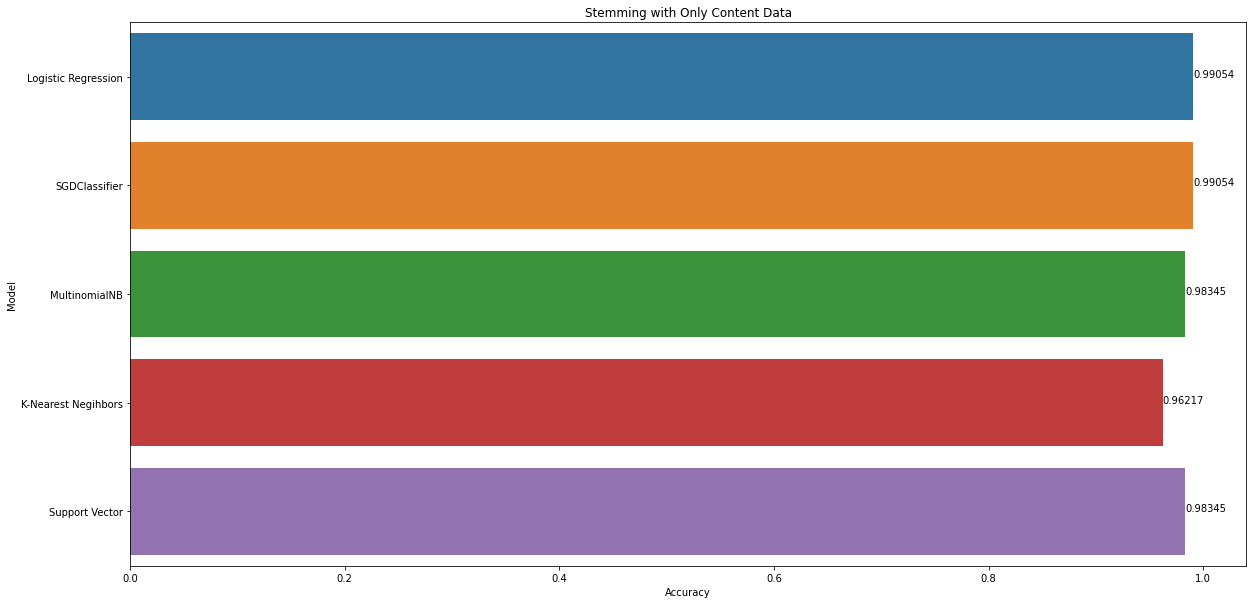

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Stemming with Only Content Data')
p = sns.barplot(df_only_content_stem['Accuracy'], df_only_content_stem['Model'], ci=None)
show_values(p, "h", space=0)

### Lemmatize with Only_Content

*ดูประสิทธิภาพการ Lemmatizing ของแต่ละโมเดลกับข้อมูล Only Content*

In [ ]:
df_only_content_lemma = all_.loc[(all_['Data'] == 'Only_Content') & (all_['Type'] == 'lemmatize')]

In [ ]:
df_only_content_lemma

,Model,Accuracy,Type,Data
1,Logistic Regression,0.990544,lemmatize,Only_Content
5,SGDClassifier,0.988180,lemmatize,Only_Content
9,MultinomialNB,0.981087,lemmatize,Only_Content
13,K-Nearest Negihbors,0.964539,lemmatize,Only_Content
17,Support Vector,0.990544,lemmatize,Only_Content


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


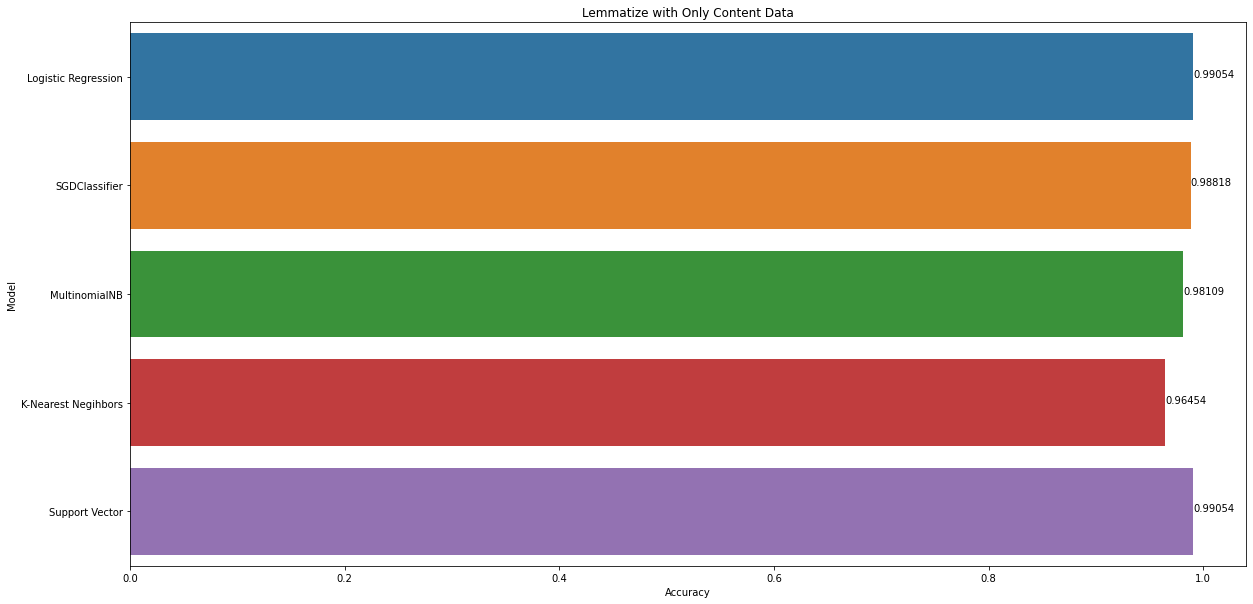

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Lemmatize with Only Content Data')
p = sns.barplot(df_only_content_lemma['Accuracy'], df_only_content_lemma['Model'], ci=None)
show_values(p, "h", space=0)

### Stemming with Content Plus Header

*ดูประสิทธิภาพการ Stemming ของแต่ละโมเดลกับข้อมูล Content Plus Header*

In [ ]:
df_content_w_header_stem = all_.loc[(all_['Data'] == 'With_Header') & (all_['Type'] == 'stemming')]

In [ ]:
df_content_w_header_stem

,Model,Accuracy,Type,Data
2,Logistic Regression,0.985816,stemming,With_Header
6,SGDClassifier,0.985816,stemming,With_Header
10,MultinomialNB,0.983452,stemming,With_Header
18,Support Vector,0.988180,stemming,With_Header


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


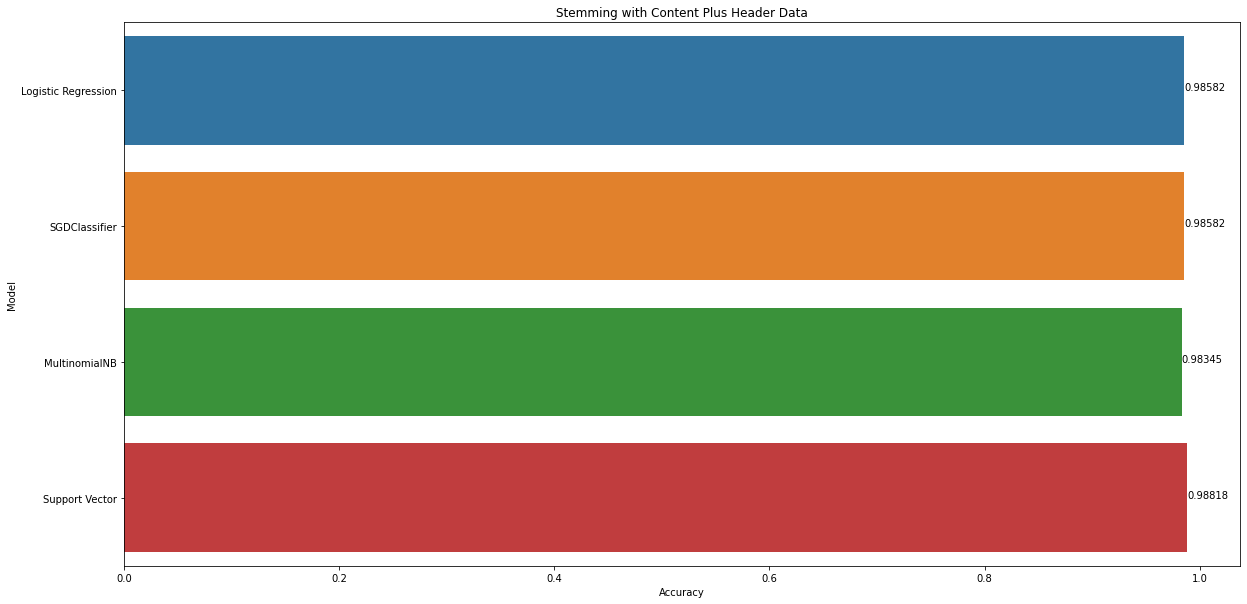

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Stemming with Content Plus Header Data')
p = sns.barplot(df_content_w_header_stem['Accuracy'], df_content_w_header_stem['Model'], ci=None)
show_values(p, "h", space=0)

### Lammatize with Content Plus Header

*ดูประสิทธิภาพการ Lemmatize ของแต่ละโมเดลกับข้อมูล Content Plus Header*

In [ ]:
df_content_w_header_lemma = all_.loc[(all_['Data'] == 'With_Header') & (all_['Type'] == 'lemmatize')]

In [ ]:
df_content_w_header_lemma

,Model,Accuracy,Type,Data
3,Logistic Regression,0.990544,lemmatize,With_Header
7,SGDClassifier,0.988180,lemmatize,With_Header
11,MultinomialNB,0.981087,lemmatize,With_Header
19,Support Vector,0.990544,lemmatize,With_Header


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


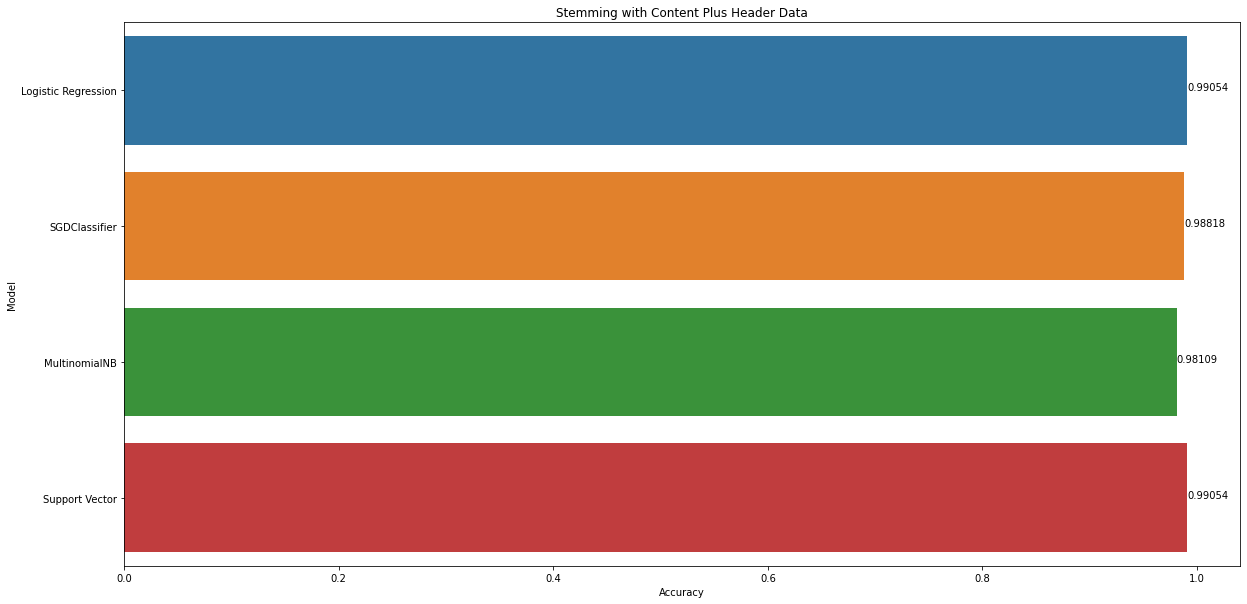

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Stemming with Content Plus Header Data')
p = sns.barplot(df_content_w_header_lemma['Accuracy'], df_content_w_header_lemma['Model'], ci=None)
show_values(p, "h", space=0)

In [ ]:
# ░░▒░░█░
# ░░▒░█
# ░░░█
# ░░█░░░░███████
# ░██░░░██▓▓███▓██▒
# ██░░░█▓▓▓▓▓▓▓█▓████
# ██░░██▓▓▓(◐)▓█▓█▓█
# ███▓▓▓█▓▓▓▓▓█▓█▓▓▓▓█
# ▀██▓▓█░██▓▓▓▓██▓▓▓▓▓█
# ░▀██▀░░█▓▓▓▓▓▓▓▓▓▓▓▓▓█
# ░░░░▒░░░█▓▓▓▓▓█▓▓▓▓▓▓█
# ░░░░▒░░░█▓▓▓▓█▓█▓▓▓▓▓█
# ░▒░░▒░░░█▓▓▓█▓▓▓█▓▓▓▓█
# ░▒░░▒░░░█▓▓▓█░░░█▓▓▓█
# ░▒░░▒░░██▓██░░░██▓▓██